In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
5,4500,775000
6,2200,500000
7,2300,510000
8,4300,750000


In [3]:
df.shape

(9, 2)

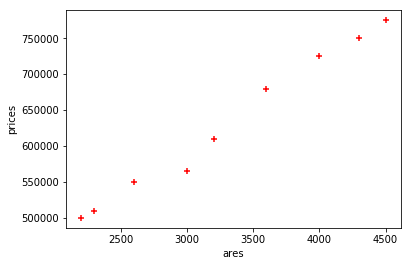

In [4]:
%matplotlib inline
plt.xlabel('ares')
plt.ylabel('prices')
plt.scatter(df.area,df.price,color='red',marker='+')


In [5]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,4500
6,2200
7,2300
8,4300


In [6]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
5    775000
6    500000
7    510000
8    750000
Name: price, dtype: int64

In [7]:
# Linear Regerssion Object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
reg.predict([[5000]])

array([838585.33791523])

In [9]:
reg.coef_

array([123.02405498])

In [10]:
reg.intercept_

223465.06300114543

In [11]:
5000*123.02405498 + 223465.36300114543

838585.6379011454

In [12]:
area_df = pd.read_csv('area')
area_df


,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [13]:
p = reg.predict(area_df)
p

array([ 346489.11798396,  408001.14547537,  506420.38946163,
        658970.21764032,  730324.16953036,  784454.7537228 ,
        898867.12485682,  649128.2932417 ,  807829.32416953,
        506420.38946163, 1330681.55784651, 1281471.93585338,
       1096935.85337915])

In [14]:
area_df['price'] = p
area_df

,area,price
0,1000,3.464891e+05
1,1500,4.080011e+05
2,2300,5.064204e+05
3,3540,6.589702e+05
4,4120,7.303242e+05
5,4560,7.844548e+05
6,5490,8.988671e+05
7,3460,6.491283e+05
8,4750,8.078293e+05
9,2300,5.064204e+05


In [15]:
area_df.to_csv('prediction.csv')

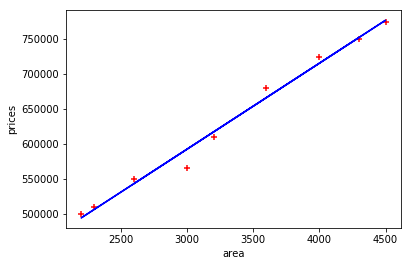

In [18]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')